# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
# Draw the inferences from the clusters obtained.

# Data Description:
 
# The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# load the data set ' EastWestAirlines.xlsx '
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# DO EDA

In [3]:
df.rename(columns={'ID#':'ID','Award?':'Award'},inplace = True)

In [4]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.set_index('ID',inplace = True)

In [6]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [8]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(keep=False, inplace=True)

In [11]:
df.shape

(3997, 11)

# From the above, we can say that there are no null values and duplicated values

In [12]:
df.describe().round(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00
mean,73637.66,144.19,2.06,1.01,1.01,17153.43,11.61,460.29,1.37,4119.82,0.37
std,100787.79,773.85,1.38,0.15,0.20,24153.96,9.60,1400.52,3.79,2064.88,0.48
min,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,2.00,0.00
25%,18538.00,0.00,1.00,1.00,1.00,1250.00,3.00,0.00,0.00,2332.00,0.00
50%,43179.00,0.00,1.00,1.00,1.00,7195.00,12.00,0.00,0.00,4099.00,0.00
75%,92406.00,0.00,3.00,1.00,1.00,23821.00,17.00,316.00,1.00,5791.00,1.00
max,1704838.00,11148.00,5.00,3.00,5.00,263685.00,86.00,30817.00,53.00,8296.00,1.00


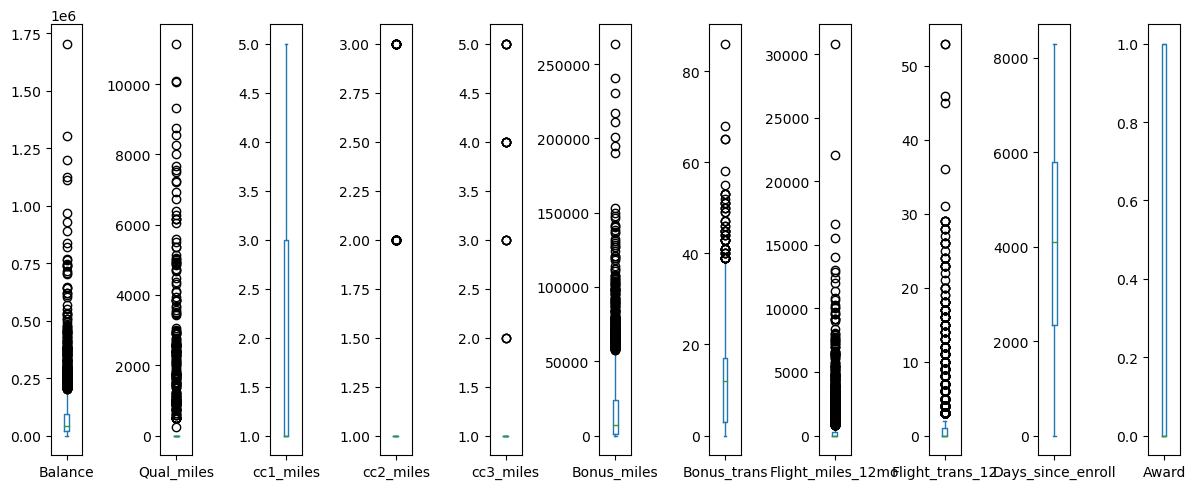

In [13]:
# univariate analysis of the data by box plot
df.plot(kind = 'box',subplots = True,figsize = (12,5))
plt.tight_layout()

In [14]:
# Correlation between the numeric features
corel = df.corr()
corel

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108670,0.338160,-0.008840,0.035225,0.403334,0.324660,0.217466,0.255611,0.262821,0.178267
Qual_miles,0.108670,1.000000,0.007861,-0.013932,-0.007785,0.030959,0.050631,0.126748,0.143977,0.017205,0.095200
cc1_miles,0.338160,0.007861,1.000000,-0.068271,0.060540,0.825153,0.608790,0.037250,0.041201,0.230499,0.335260
cc2_miles,-0.008840,-0.013932,-0.068271,1.000000,-0.006169,-0.004004,0.064363,0.010582,0.028267,-0.005870,0.005295
cc3_miles,0.035225,-0.007785,0.060540,-0.006169,1.000000,0.204138,0.097311,-0.001788,-0.001128,0.010798,0.023464
Bonus_miles,0.403334,0.030959,0.825153,-0.004004,0.204138,1.000000,0.603048,0.183448,0.185162,0.210068,0.373336
Bonus_trans,0.324660,0.050631,0.608790,0.064363,0.097311,0.603048,1.000000,0.377165,0.432318,0.160643,0.333600
Flight_miles_12mo,0.217466,0.126748,0.037250,0.010582,-0.001788,0.183448,0.377165,1.000000,0.869185,0.037085,0.217627
Flight_trans_12,0.255611,0.143977,0.041201,0.028267,-0.001128,0.185162,0.432318,0.869185,1.000000,0.059063,0.247815
Days_since_enroll,0.262821,0.017205,0.230499,-0.005870,0.010798,0.210068,0.160643,0.037085,0.059063,1.000000,0.187750


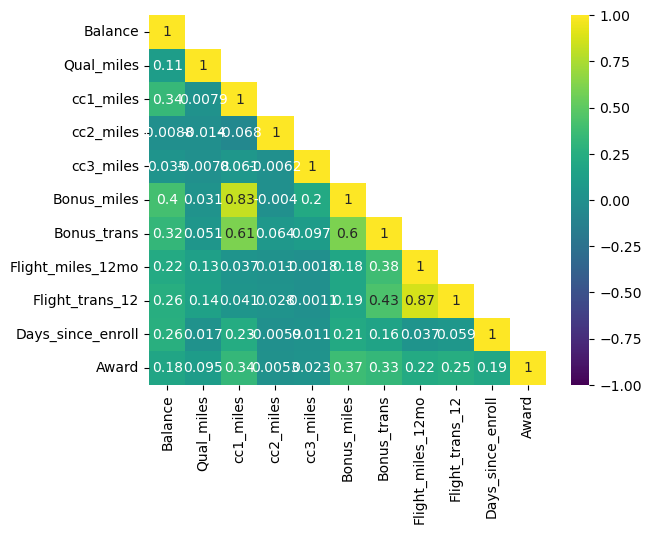

In [15]:
# Heat map visualisation
sns.heatmap(data = corel , annot = True,vmin=-1,vmax = 1,mask = np.triu(corel,1),cmap='viridis');

# There is only some positive correlation between the cc1_miles and Bonus_miles

# 

# HIERARCHIAL CLUSTERING

In [16]:
# scale the numeric features of the dataset using minmax scaler. exclude the State feature
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
df_scaled = mm_scaler.fit_transform(df)

In [17]:
# create a dataframe of the scaled features
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [18]:
df_scaled.describe().round(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00
mean,0.04,0.01,0.27,0.01,0.00,0.07,0.13,0.01,0.03,0.50,0.37
std,0.06,0.07,0.34,0.07,0.05,0.09,0.11,0.05,0.07,0.25,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.01,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.28,0.00
50%,0.03,0.00,0.00,0.00,0.00,0.03,0.14,0.00,0.00,0.49,0.00
75%,0.05,0.00,0.50,0.00,0.00,0.09,0.20,0.01,0.02,0.70,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Here min=0 and max = 1 so min_max_scaler is done

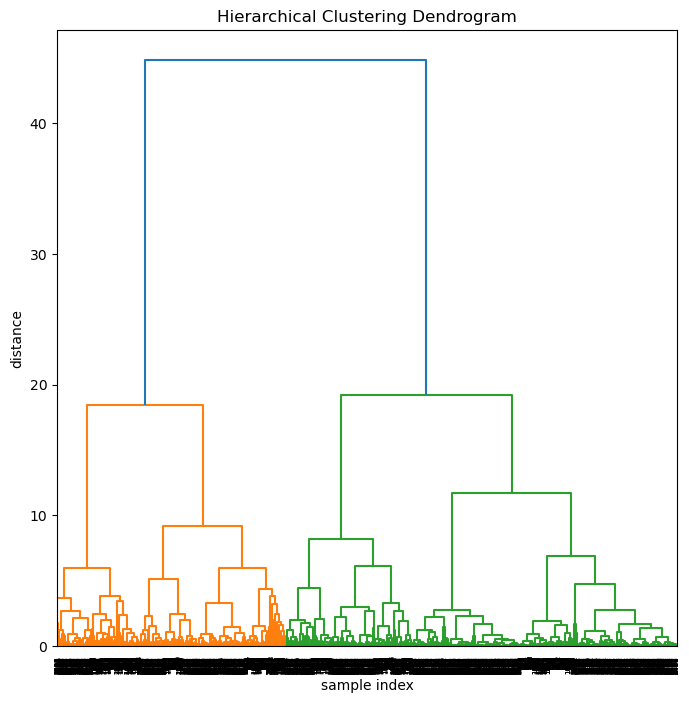

In [26]:
# import dendrogram and linkage from scipy. create linkage object using wards method. display dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_scaled, 'ward') # conventionally we denoate the linkage object as Z
plt.figure(figsize=(8, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z);

# # The x-axis contains the samples Index and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 2 and cut the dendrogram:

In [19]:
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [20]:
# get the cluster labels using fit_predict method of the agglo object
labels = agglo.fit_predict(df_scaled)
labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
# add cluster labels to the dataset
df['cluster_labels'] = labels
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_labels
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


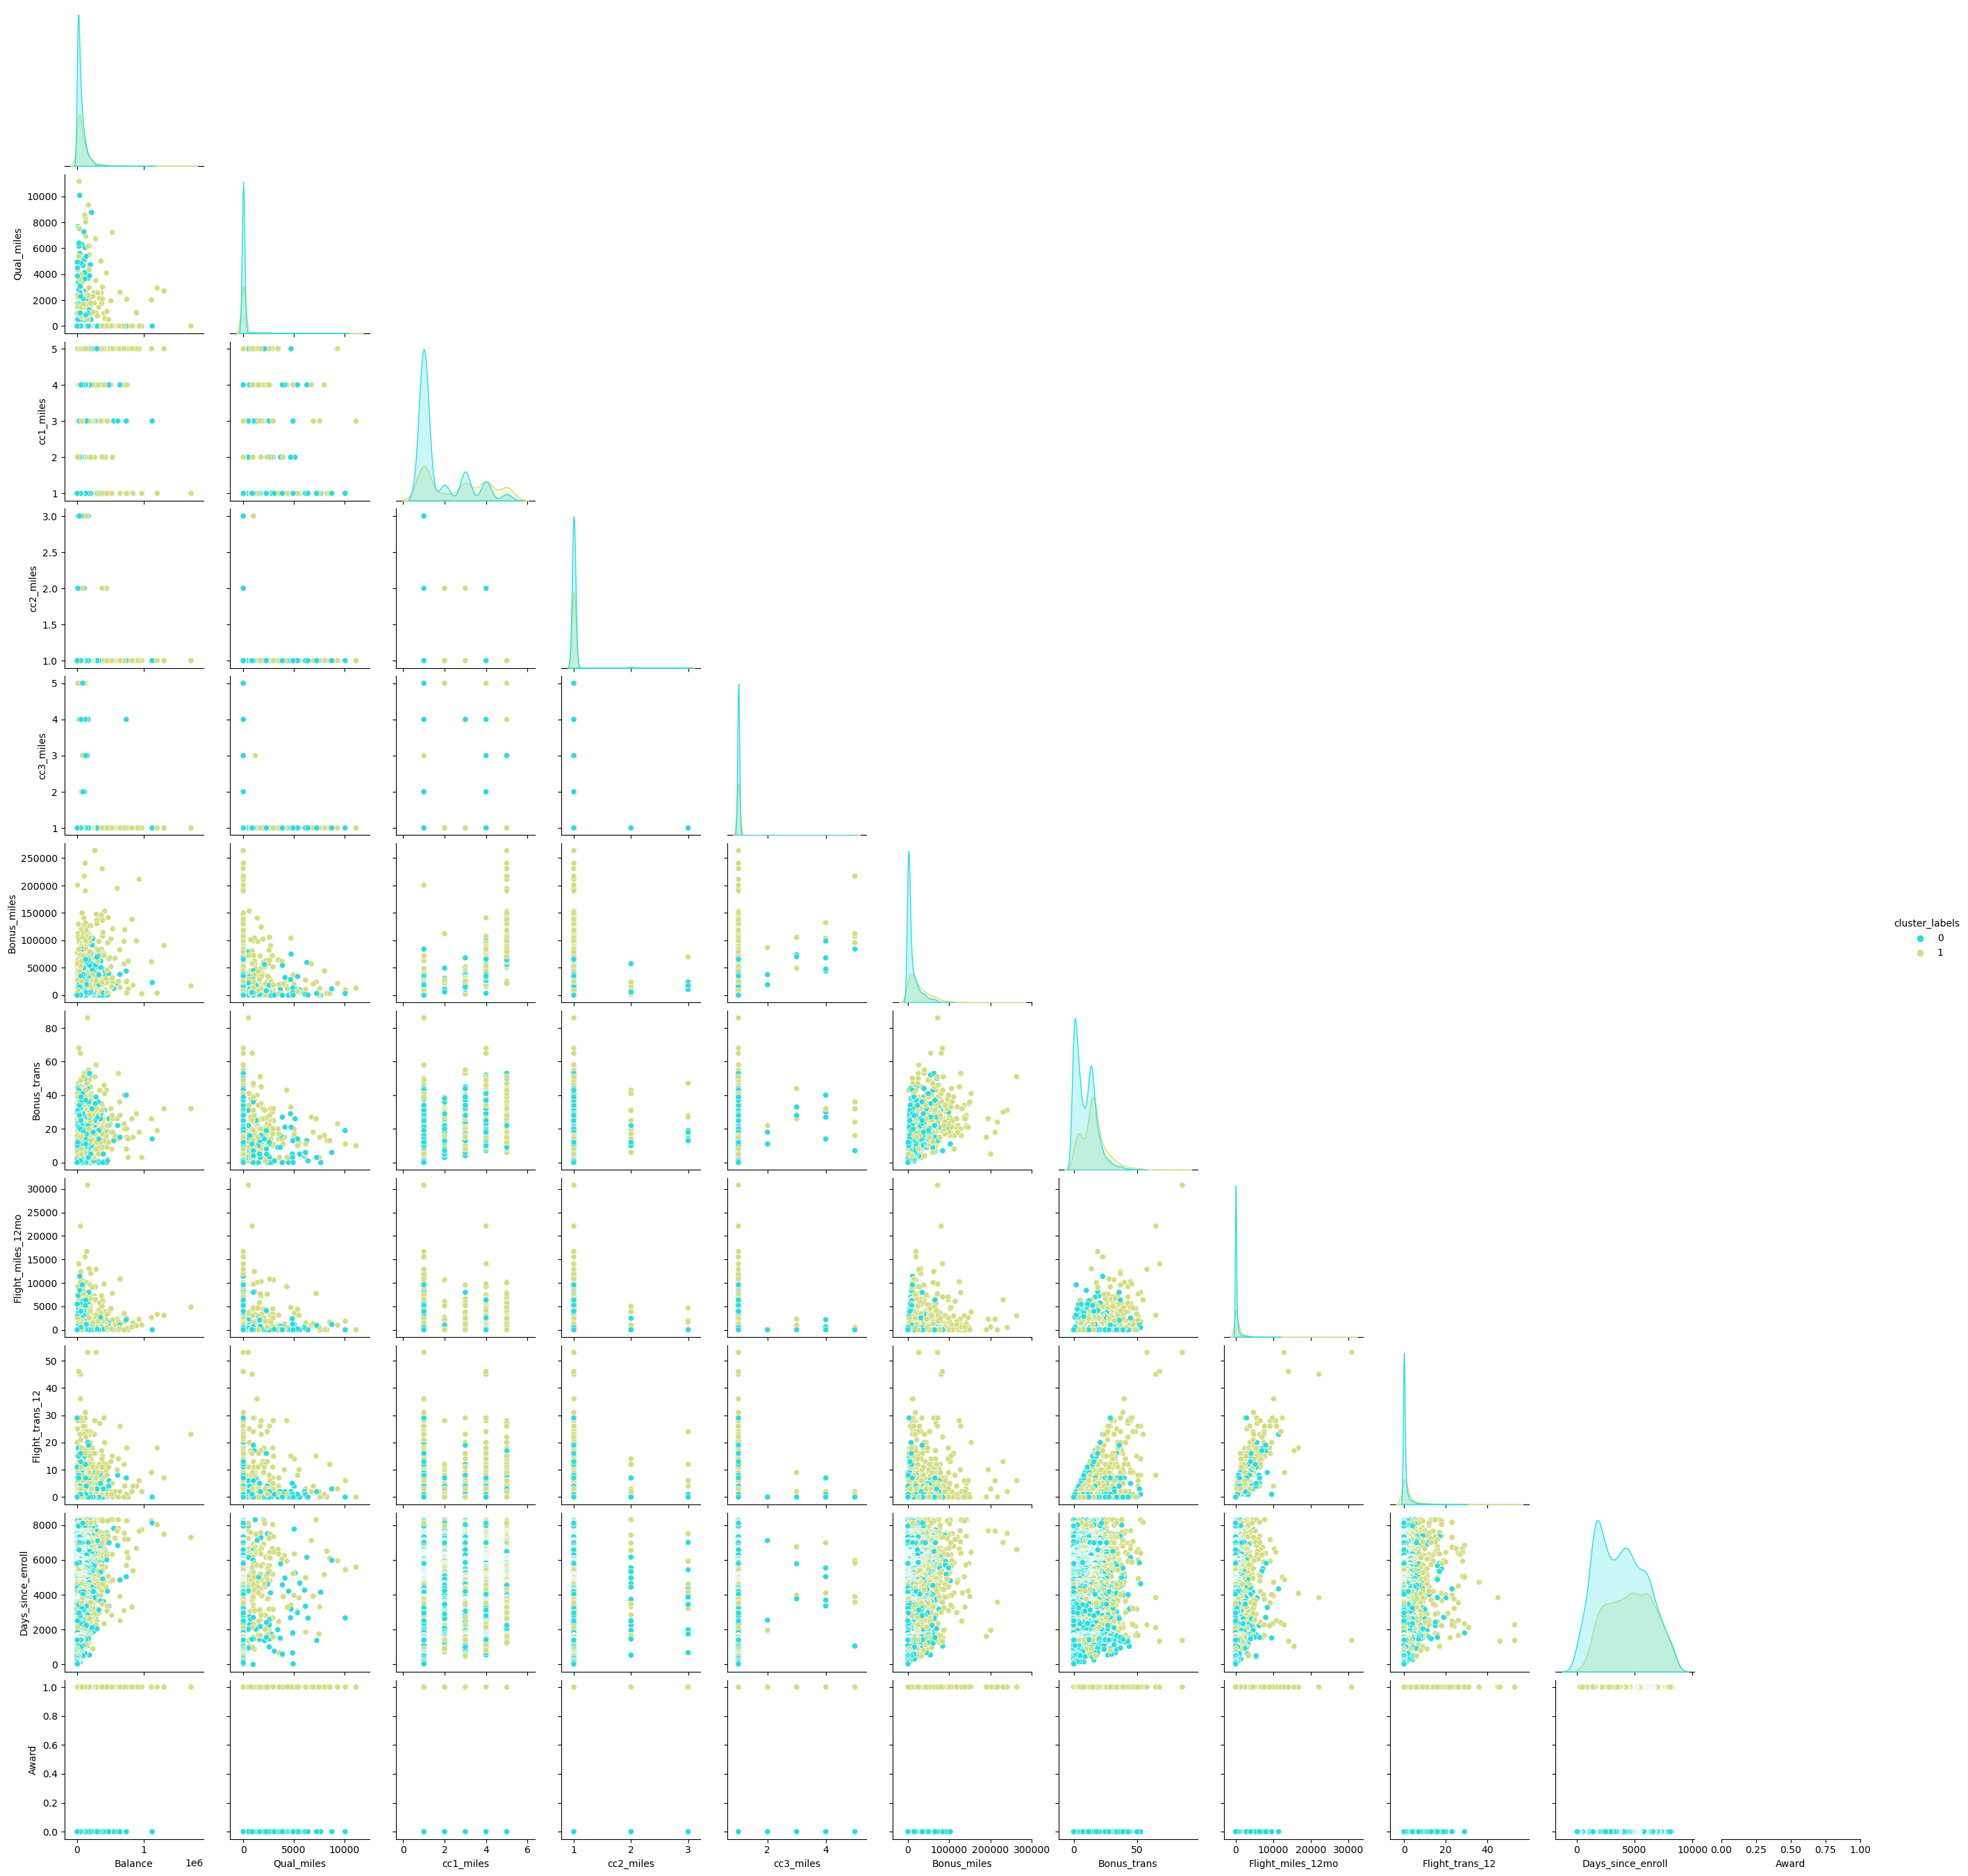

In [30]:
# plot the pairplot with hue based on cluster label
sns.pairplot(df, hue='cluster_labels', palette='rainbow',corner=True,diag_kind='kde');

In [22]:
# generate the cluster profiles
df.groupby('cluster_labels').mean().round(0)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_labels,,,,,,,,,,,
0,59855.0,88.0,2.0,1.0,1.0,10236.0,9.0,226.0,1.0,3822.0,0.0
1,97053.0,240.0,3.0,1.0,1.0,28905.0,16.0,858.0,3.0,4625.0,1.0


# We can now clearly see the 2 number of clusters formed, which can be described as under
# Cluster1, Tier 1 = "1" = Defines the group of fliers that earn the most out of the card and are frequent fliers and eligible for award
# Cluster0, Tier 2 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers and not eligible for award

# DBSCAN CLUSTERING

In [23]:
# load the data set again as df_dbscan
df_dbscan = pd.read_excel('EastWestAirlines.xlsx',sheet_name = 'data')

In [24]:
df_dbscan.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [25]:
df_dbscan.rename(columns = {'ID#':'ID','Award?':'Award'}, inplace = True)

In [26]:
df_dbscan.set_index('ID',inplace = True)

In [27]:
df_dbscan.drop_duplicates(keep=False, inplace=True)

In [28]:
df_dbscan.shape

(3997, 11)

In [29]:
df_dbscan.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [30]:
# This time scaling tha data with Standard scaler
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_dbscan)
df_scaler = pd.DataFrame(df_scaler, columns=df_dbscan.columns)
df_scaler.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451447,-0.186347,-0.769885,-0.098267,-0.062782,-0.703054,-1.104796,-0.328694,-0.362270,1.395015,-0.767224
1,-0.539753,-0.186347,-0.769885,-0.098267,-0.062782,-0.701357,-1.000646,-0.328694,-0.362270,1.379516,-0.767224
2,-0.320353,-0.186347,-0.769885,-0.098267,-0.062782,-0.539541,-0.792345,-0.328694,-0.362270,1.411483,-0.767224
3,-0.584089,-0.186347,-0.769885,-0.098267,-0.062782,-0.689556,-1.104796,-0.328694,-0.362270,1.371766,-0.767224
4,0.239289,-0.186347,1.408942,-0.098267,-0.062782,1.082632,1.498963,1.154510,0.692159,1.363532,1.303400


In [31]:
df_scaler.describe().round(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00,3997.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.73,-0.19,-0.77,-0.10,-0.06,-0.71,-1.21,-0.33,-0.36,-1.99,-0.77
25%,-0.55,-0.19,-0.77,-0.10,-0.06,-0.66,-0.90,-0.33,-0.36,-0.87,-0.77
50%,-0.30,-0.19,-0.77,-0.10,-0.06,-0.41,0.04,-0.33,-0.36,-0.01,-0.77
75%,0.19,-0.19,0.68,-0.10,-0.06,0.28,0.56,-0.10,-0.10,0.81,1.30
max,16.19,14.22,2.14,13.45,20.42,10.21,7.75,21.68,13.61,2.02,1.30


# All  Vlues are between -3 and +3 , so standard scaler done

In [40]:
from itertools import product
from sklearn.metrics import silhouette_score
eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [41]:
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_scaler)
    sil_score.append(silhouette_score(df_scaler, DBS_clustering.labels_))

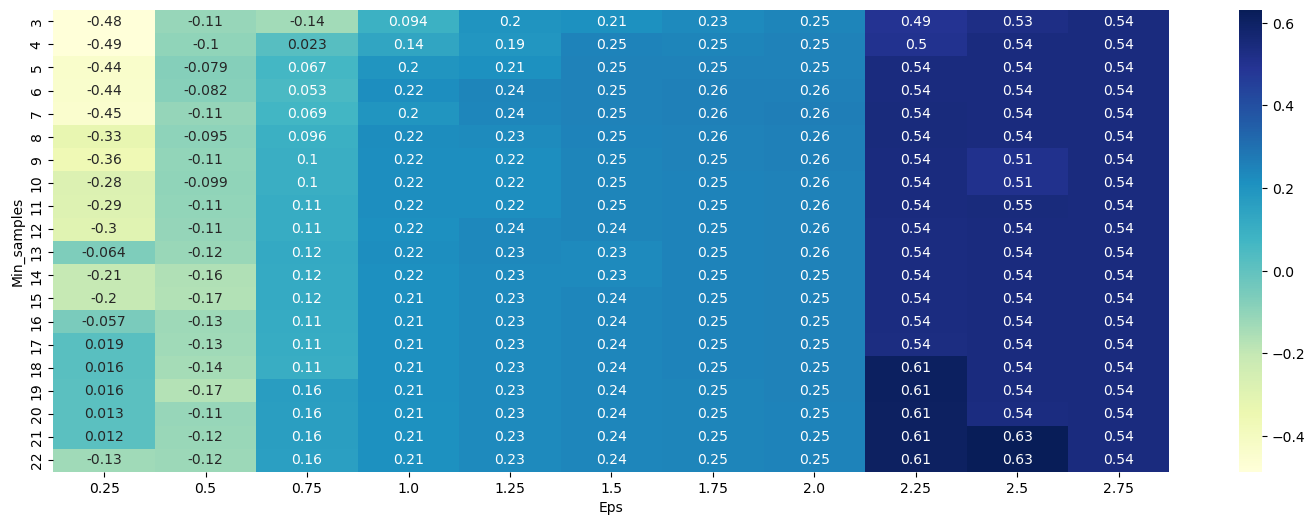

In [42]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

# Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22

In [44]:
# Instantiate a DBSCAN model object and fit it to the scaled data - take some values for eps and min_samples
# eps =2.5 , min_samples = 21
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(df_scaler)

DBSCAN(eps=2.5, min_samples=21)

In [45]:
# get the labels of the clusters
labels_dbscan = dbscan.labels_
labels_dbscan

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
# add the labels to the original dataset as a new feature
df_dbscan['cluster_labels'] = labels_dbscan
df_dbscan.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_labels
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


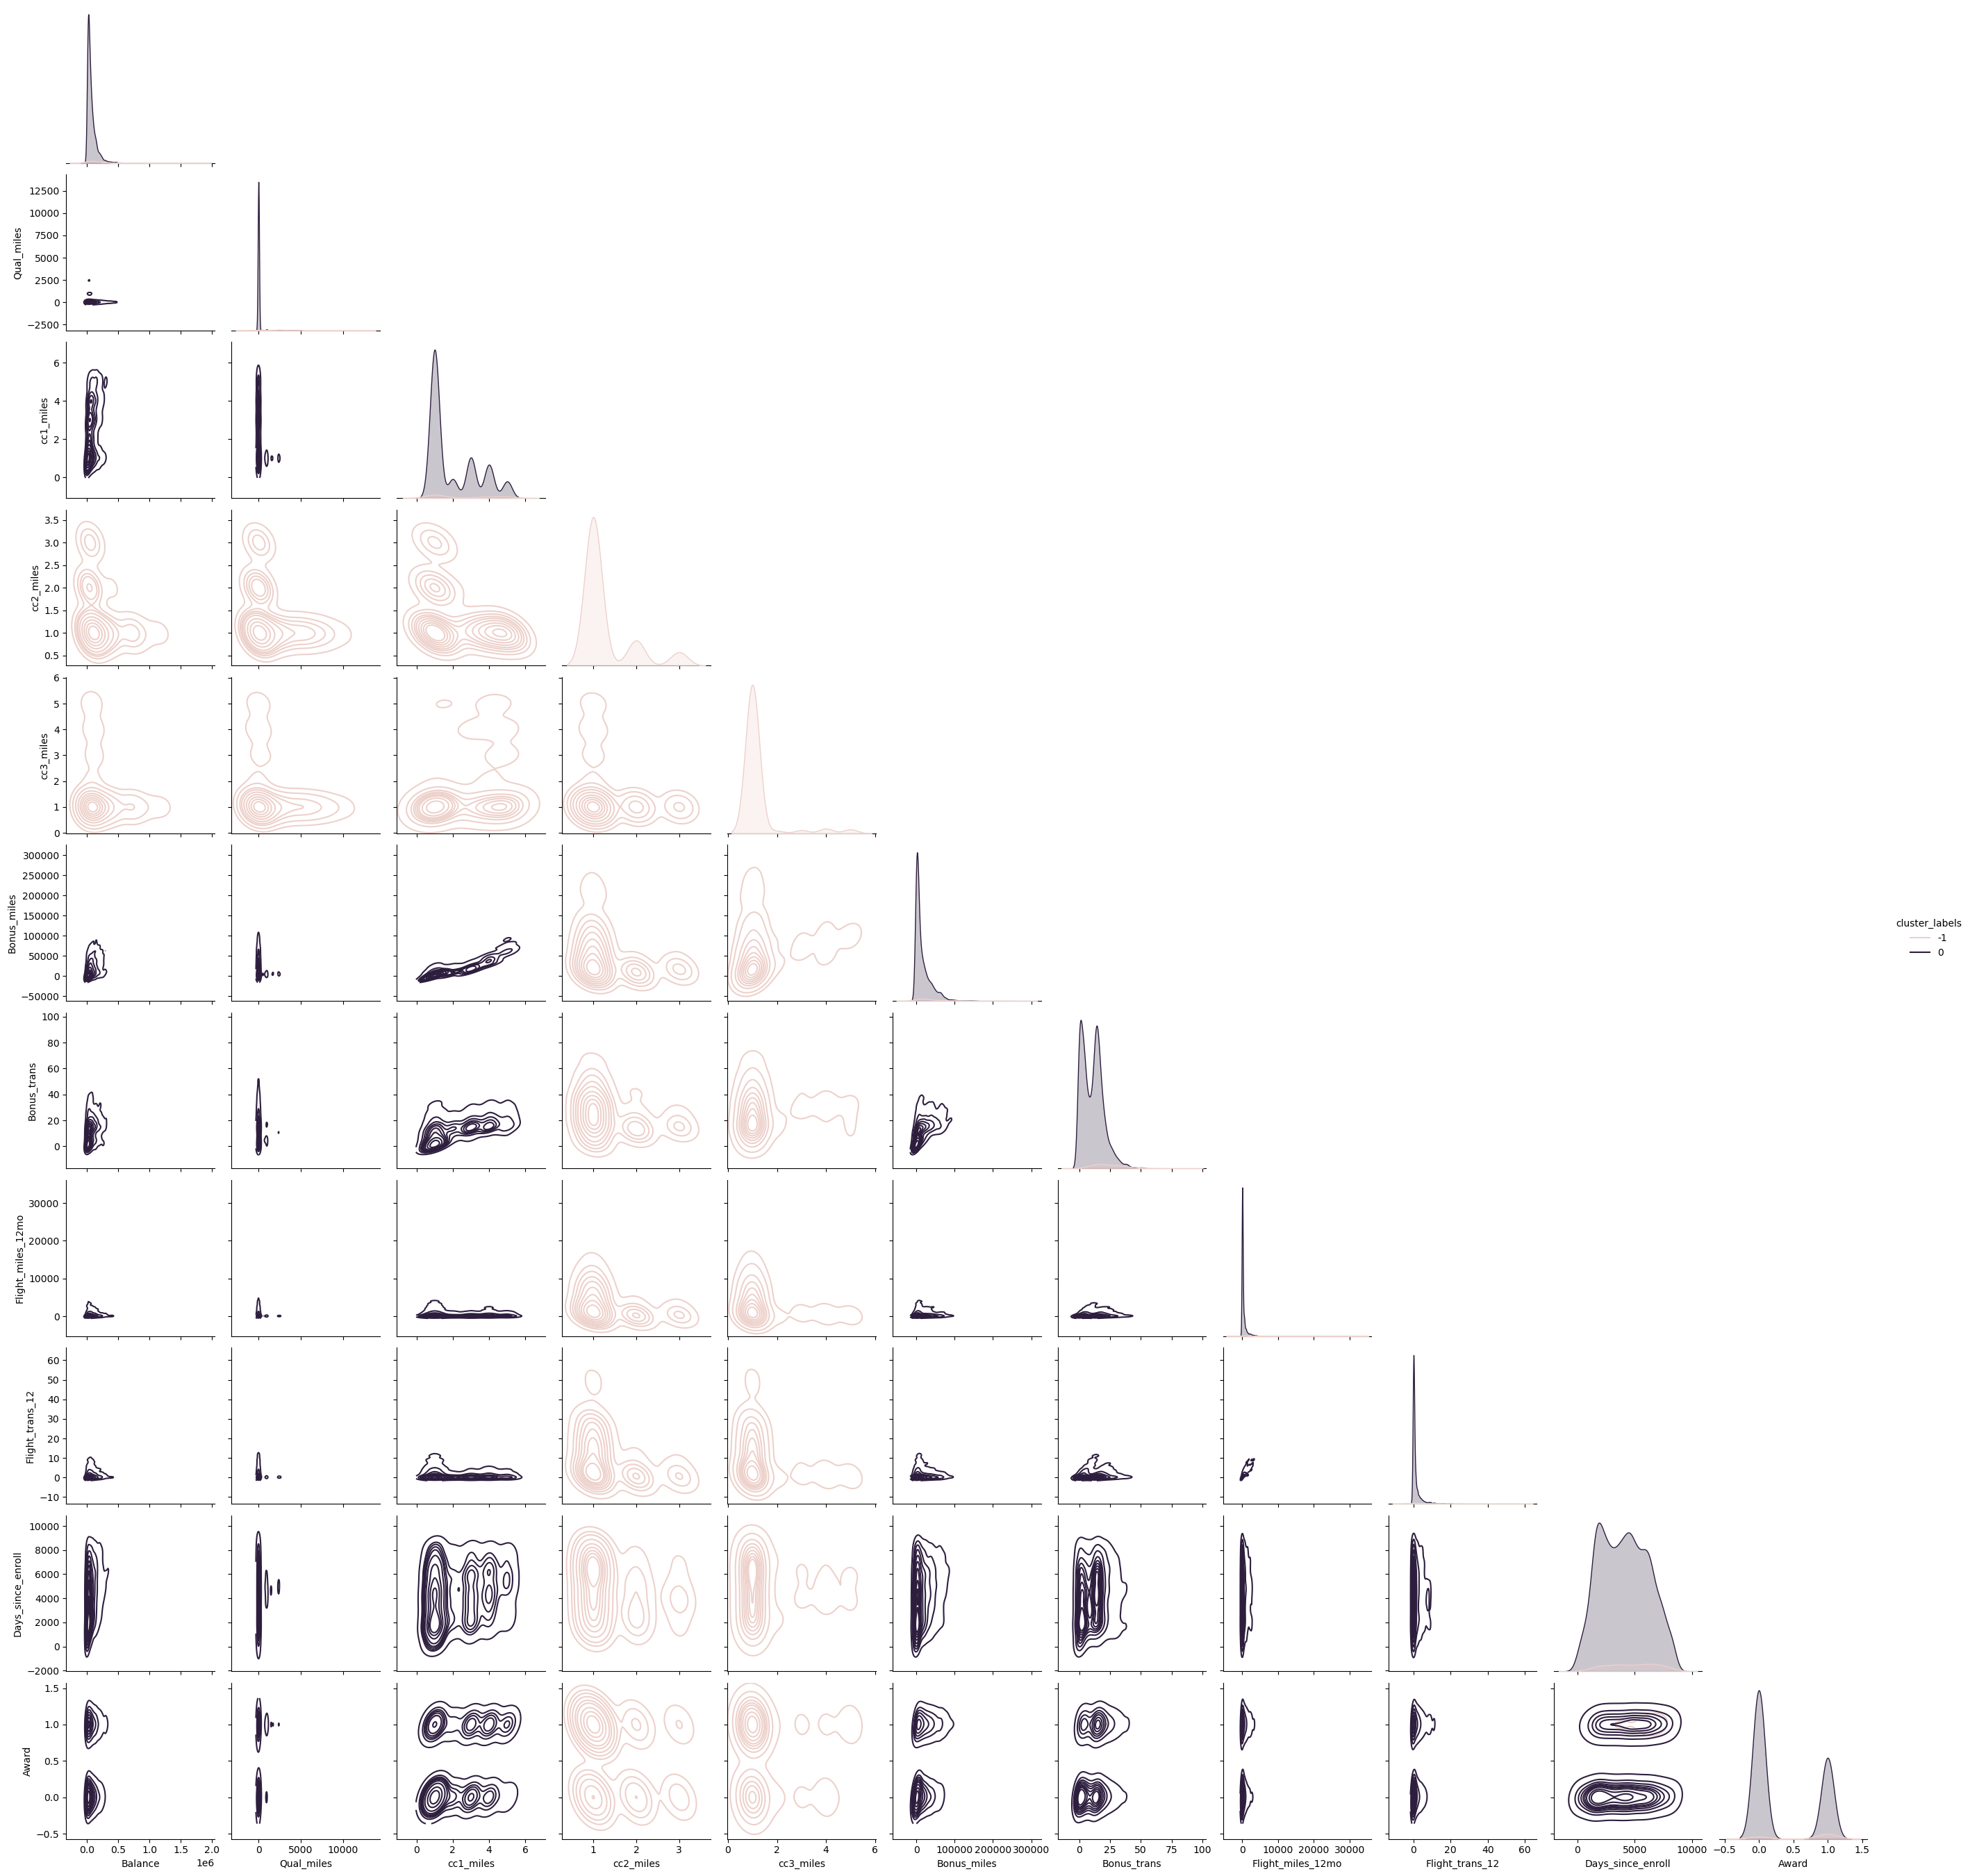

In [47]:
# scatter plot visualisation of DBSCAN CLUSTERING
sns.pairplot(data = df_dbscan, hue = 'cluster_labels',corner = True , kind = 'kde');

In [48]:
df_dbscan.groupby('cluster_labels').mean().round(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_labels,,,,,,,,,,,
-1,211990.89,1522.58,2.51,1.28,1.24,45335.08,24.75,3276.39,9.55,4768.60,0.69
0,66042.65,68.52,2.04,1.00,1.00,15606.37,10.89,305.69,0.93,4084.21,0.35


# We can now clearly see the 2 number of clusters formed, which can be described as under
# Cluster1, Tier 1 = "-1" = Defines the group of fliers that earn the most out of the card and are frequent fliers and eligible for award
# Cluster0, Tier 2 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers and not eligible for award

#

# KMEANS CLUSTERING

In [49]:
df_kmeans = df_dbscan.copy()

In [50]:
df_kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_labels
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [51]:
df_kmeans.drop('cluster_labels',axis = 1,inplace = True)

In [52]:
df_kmeans.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [53]:
# import KMeans & find optimum number of clusters using elbow method
from sklearn.cluster import KMeans
wss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(df_scaler)
    wss.append(km.inertia_)

In [54]:
# wss values
wss

[43966.99999999996,
 35395.180292111225,
 30886.976673147397,
 27144.601701296375,
 23698.163310025924,
 21465.32316131907,
 19875.870687900526,
 17312.245975950307,
 15956.178347527744,
 14724.363202592942]

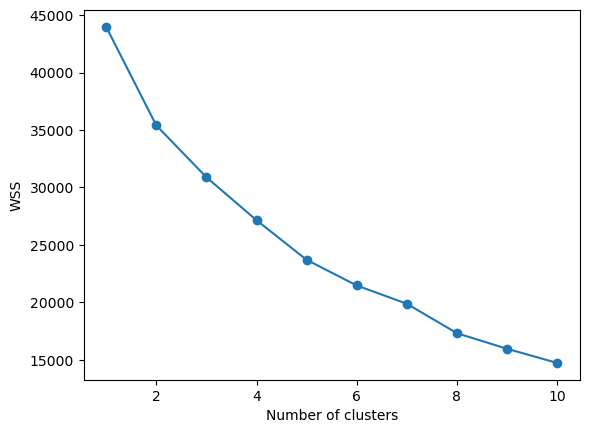

In [55]:
# plot the elbow curve
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WSS');

In [56]:
# From the above graph the optimum number of clusters = 2

In [57]:
# optimum number of cluster is 2. implement a kmeans clustering modek with k =2 and get the labels
km = KMeans(n_clusters=2,random_state=123)
km.fit(df_scaler)
labels_km = km.labels_
labels_km

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
df_kmeans['cluster_labels']=labels_km

In [59]:
df_kmeans.groupby('cluster_labels').mean().round(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
cluster_labels,,,,,,,,,,,
0,45074.33,89.3,1.31,1.02,1.00,5425.43,7.37,215.37,0.64,3722.41,0.21
1,132760.66,257.8,3.61,1.01,1.04,41429.12,20.38,967.23,2.90,4942.42,0.71


# We can now clearly see the 2 number of clusters formed, which can be described as under
# Cluster1, Tier 1 = "1" = Defines the group of fliers that earn the most out of the card and are frequent fliers and eligible for award
# Cluster0, Tier 2 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers and not eligible for award